In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'load killings'
police = pd.read_csv('fatal-police-shootings-data.csv')
police['city'] = police['city'].str.replace(r' city', '') #removes anything with a lower-cased ' city', done to try to clean up data
police['city'] = police['city'].str.replace(r'St ', 'St. ')#St Louis in police is St. Louis in CityPopulation2000
police['city'] = police['city'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 

police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [3]:
'loading population'
city_population = pd.read_csv('CityPopulation2000.csv', encoding = "ISO-8859-1")

print(city_population.dtypes) #shows the type of data contained in cells

city_population['Population'] = city_population['Population'].str.replace(r'\(r.*\)', '')#removes anything that has a (r) in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r"[\s\S]*.*(balance).*[\s\S]", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
city_population['City'] = city_population['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
city_population['City'] = city_population['City'].str.replace(r' village', '')#removes lowercase villages
city_population['City'] = city_population['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
city_population['City'] = city_population['City'].str.replace(r' town', '')#removes lowercase town
city_population['City'] = city_population['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu
city_population['City'] = city_population['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
city_population['City'] = city_population['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 

type_dict = {'Geographic Area': 'str', 'City': 'str', 'Population': 'int64'}#done to change population values into an integer
city_population = city_population.astype(type_dict)#done to change population values into an integer

print(city_population.dtypes)
print(len(city_population))

city_population

Geographic Area    object
City               object
Population         object
dtype: object
Geographic Area    object
City               object
Population          int64
dtype: object
29523


,Geographic Area,City,Population
0,AL,Abanda,192
1,AL,Abbeville,2688
2,AL,Adamsville,4522
3,AL,Addison,758
4,AL,Akron,356
5,AL,Alabaster,30352
6,AL,Albertville,21160
7,AL,Alexander City,14875
8,AL,Alexandria,3917
9,AL,Aliceville,2486


In [4]:
'getting number of shootings per city'
csk=police.groupby(["city", "state"]).size() 
print(len(csk))
lst_csk = list(csk)
print(lst_csk[0])
csk


2471
1


city                          state
300 block of State Line Road  TN        1
Abbeville                     AL        1
Aberdeen                      NC        1
                              WA        1
Abilene                       TX        2
Abingdon                      MD        1
                              VA        1
Abington Township             PA        1
Acworth                       GA        1
Ada                           OK        1
Adams County                  CO        3
Addison                       TX        1
Adelanto                      CA        1
Affton                        MO        1
Aguanga                       CA        1
Ahwatukee                     AZ        1
Aiea                          HI        1
Aiken                         SC        2
Aitkin                        MN        1
Akron                         OH        6
Alamo                         TN        2
Alamogordo                    NM        2
Alamosa                       CO        

In [5]:
'creating list of city-state associations'
csk_dict=dict(csk)
print(len(csk_dict))
lst_csk_dict=list(csk_dict)
lst_csk_dict


2471


[('300 block of State Line Road', 'TN'),
 ('Abbeville', 'AL'),
 ('Aberdeen', 'NC'),
 ('Aberdeen', 'WA'),
 ('Abilene', 'TX'),
 ('Abingdon', 'MD'),
 ('Abingdon', 'VA'),
 ('Abington Township', 'PA'),
 ('Acworth', 'GA'),
 ('Ada', 'OK'),
 ('Adams County', 'CO'),
 ('Addison', 'TX'),
 ('Adelanto', 'CA'),
 ('Affton', 'MO'),
 ('Aguanga', 'CA'),
 ('Ahwatukee', 'AZ'),
 ('Aiea', 'HI'),
 ('Aiken', 'SC'),
 ('Aitkin', 'MN'),
 ('Akron', 'OH'),
 ('Alamo', 'TN'),
 ('Alamogordo', 'NM'),
 ('Alamosa', 'CO'),
 ('Albany', 'GA'),
 ('Albany', 'NY'),
 ('Albert Lea', 'MN'),
 ('Albuquerque', 'NM'),
 ('Alderwood Manor', 'WA'),
 ('Aldie', 'VA'),
 ('Alexandria', 'LA'),
 ('Alexandria', 'MN'),
 ('Alexandria', 'VA'),
 ('Algoma Township', 'MI'),
 ('Alhambra', 'CA'),
 ('Aliceville', 'CA'),
 ('Allen', 'TX'),
 ('Allentown', 'PA'),
 ('Aloha', 'OR'),
 ('Alpine', 'CA'),
 ('Alton', 'IL'),
 ('Altoona', 'IA'),
 ('Alvin', 'TX'),
 ('Amarillo', 'TX'),
 ('Amelia Island', 'FL'),
 ('Amite', 'LA'),
 ('Amity', 'OR'),
 ('Anadarko', 'OK')

In [6]:
'create list with city, police shootings, and state'
def make_list_of_city_kill_state(kill_count,city_state):
    lst=[]
    for i in range(len(kill_count)):
        lst.append([city_state[i][0],kill_count[i],city_state[i][1]])
    return lst

city_kill_state = make_list_of_city_kill_state(lst_csk,lst_csk_dict)
print(len(city_kill_state))
city_kill_state

2471


[['300 block of State Line Road', 1, 'TN'],
 ['Abbeville', 1, 'AL'],
 ['Aberdeen', 1, 'NC'],
 ['Aberdeen', 1, 'WA'],
 ['Abilene', 2, 'TX'],
 ['Abingdon', 1, 'MD'],
 ['Abingdon', 1, 'VA'],
 ['Abington Township', 1, 'PA'],
 ['Acworth', 1, 'GA'],
 ['Ada', 1, 'OK'],
 ['Adams County', 3, 'CO'],
 ['Addison', 1, 'TX'],
 ['Adelanto', 1, 'CA'],
 ['Affton', 1, 'MO'],
 ['Aguanga', 1, 'CA'],
 ['Ahwatukee', 1, 'AZ'],
 ['Aiea', 1, 'HI'],
 ['Aiken', 2, 'SC'],
 ['Aitkin', 1, 'MN'],
 ['Akron', 6, 'OH'],
 ['Alamo', 2, 'TN'],
 ['Alamogordo', 2, 'NM'],
 ['Alamosa', 2, 'CO'],
 ['Albany', 1, 'GA'],
 ['Albany', 1, 'NY'],
 ['Albert Lea', 1, 'MN'],
 ['Albuquerque', 31, 'NM'],
 ['Alderwood Manor', 1, 'WA'],
 ['Aldie', 1, 'VA'],
 ['Alexandria', 2, 'LA'],
 ['Alexandria', 1, 'MN'],
 ['Alexandria', 1, 'VA'],
 ['Algoma Township', 1, 'MI'],
 ['Alhambra', 1, 'CA'],
 ['Aliceville', 1, 'CA'],
 ['Allen', 2, 'TX'],
 ['Allentown', 3, 'PA'],
 ['Aloha', 2, 'OR'],
 ['Alpine', 2, 'CA'],
 ['Alton', 2, 'IL'],
 ['Altoona', 1, 'IA

In [7]:
'making sure that cities have a length'
len(city_kill_state[2][0])

8

In [8]:
'make a list of city populations'
city_pop_lst=[]
for i in range(len(city_population)):
    city_pop_lst.append([city_population['City'][i],city_population['Population'][i],city_population['Geographic Area'][i]])
print(len(city_pop_lst))
city_pop_lst


29523


[['Abanda', 192, 'AL'],
 ['Abbeville', 2688, 'AL'],
 ['Adamsville', 4522, 'AL'],
 ['Addison', 758, 'AL'],
 ['Akron', 356, 'AL'],
 ['Alabaster', 30352, 'AL'],
 ['Albertville', 21160, 'AL'],
 ['Alexander City', 14875, 'AL'],
 ['Alexandria', 3917, 'AL'],
 ['Aliceville', 2486, 'AL'],
 ['Allgood', 622, 'AL'],
 ['Altoona', 933, 'AL'],
 ['Andalusia', 9015, 'AL'],
 ['Anderson', 282, 'AL'],
 ['Anniston', 23106, 'AL'],
 ['Arab', 8050, 'AL'],
 ['Ardmore', 1194, 'AL'],
 ['Argo', 4071, 'AL'],
 ['Ariton', 764, 'AL'],
 ['Arley', 357, 'AL'],
 ['Ashford', 2148, 'AL'],
 ['Ashland', 2037, 'AL'],
 ['Ashville', 2212, 'AL'],
 ['Athens', 21897, 'AL'],
 ['Atmore', 10194, 'AL'],
 ['Attalla', 6048, 'AL'],
 ['Auburn', 53380, 'AL'],
 ['Autaugaville', 870, 'AL'],
 ['Avon', 543, 'AL'],
 ['Axis', 757, 'AL'],
 ['Babbie', 603, 'AL'],
 ['Baileyton', 610, 'AL'],
 ['Bakerhill', 279, 'AL'],
 ['Ballplay', 1580, 'AL'],
 ['Banks', 179, 'AL'],
 ['Bay Minette', 8044, 'AL'],
 ['Bayou La Batre', 2558, 'AL'],
 ['Bear Creek', 1070

In [9]:
'making sure that cities have a length'
len(city_pop_lst[0][0])

6

In [10]:
'taking care of division by zero error that could pop up'
city_pop_lst[25325][1]=1#the population of this used to be 0...
city_pop_lst[25325]

['Laredo Ranchettes West', 1, 'TX']

In [11]:
'taking care of division by zero that could pop up'
city_pop_lst[3331][1]=1#the population of this used to be 0...
city_pop_lst[3331]

['University of California Merced', 1, 'CA']

In [12]:
'tried to get method to get variables, did not work'
def get_city(lst,x):
    return lst[x][0]
def get_number(lst,x):
    return lst[x][1]
def get_state(lst,x):
    return lst[x][2]

In [13]:
print(get_city(city_kill_state,0))
print(get_city(city_pop_lst,0))

300 block of State Line Road
Abanda


In [14]:
print(get_number(city_kill_state,0))
print(get_number(city_pop_lst,0))

1
192


In [15]:
print(get_state(city_kill_state,0))
print(get_state(city_pop_lst,0))

TN
AL


In [16]:
'making a few functions to help later'
def find_city(city_name,lst):
    for i in range(len(lst)):
        if city_name in lst[i][0]:
            print(lst[i])
            print(i)
def find_repeats(lst):
    for i in range(len(lst)):
        if len(lst[i])>4:
            print(lst[i])
def find_emptys(lst):
    for i in range(len(lst)):
        if len(lst[i])==3:
            print(lst[i])
killings_per_capita_eq=city_kill_state.copy()


In [17]:
"making the function that makes list of kills per capita"
print(len(city_kill_state))
def per_capita(city_kill_state,city_pop_lst):
    for i in range(len(city_kill_state)):
        for x in range(len(city_pop_lst)):
            try:
                if city_kill_state[i][0] == city_pop_lst[x][0]:
                    if city_kill_state[i][2] == city_pop_lst[x][2]:
                        per_capita =100000 * float(city_kill_state[i][1])/float(city_pop_lst[x][1])
                        city_kill_state[i].extend([float(city_pop_lst[x][1]),per_capita])
            except:
                raise ZeroDivisionError(x)
    print(len(city_kill_state))
    return city_kill_state

2471


In [18]:
'using the function'
per_capita(killings_per_capita_eq,city_pop_lst)

2471


[['300 block of State Line Road', 1, 'TN'],
 ['Abbeville', 1, 'AL', 2688.0, 37.20238095238095],
 ['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993],
 ['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606],
 ['Abilene', 2, 'TX', 117063.0, 1.7084817576860323],
 ['Abingdon', 1, 'MD'],
 ['Abingdon', 1, 'VA', 8191.0, 12.208521548040533],
 ['Abington Township', 1, 'PA'],
 ['Acworth', 1, 'GA', 20425.0, 4.8959608323133414],
 ['Ada', 1, 'OK', 16810.0, 5.94883997620464],
 ['Adams County', 3, 'CO'],
 ['Addison', 1, 'TX', 13056.0, 7.659313725490196],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158],
 ['Affton', 1, 'MO', 20307.0, 4.924410301866351],
 ['Aguanga', 1, 'CA', 1128.0, 88.65248226950355],
 ['Ahwatukee', 1, 'AZ'],
 ['Aiea', 1, 'HI', 9338.0, 10.708931248661383],
 ['Aiken', 2, 'SC', 29524.0, 6.774149844194554],
 ['Aitkin', 1, 'MN', 2165.0, 46.18937644341801],
 ['Akron', 6, 'OH', 199110.0, 3.0134096730450506],
 ['Alamo', 2, 'TN', 2461.0, 81.26777732629013],
 ['Alamogordo', 2, 'NM', 30403.0, 6.578

In [19]:
'checking how many lists got divided, got divided too much, an got divided just right'
'then creating lists with thoe categories'
no_response=[]
too_many=[]
just_right=[]
everything_but_emptys=[]
for i in range(len(killings_per_capita_eq)):
    if len(killings_per_capita_eq[i]) == 3:
        no_response.append(killings_per_capita_eq[i])
for i in range(len(killings_per_capita_eq)):
    if len(killings_per_capita_eq[i]) > 5:
        too_many.append(killings_per_capita_eq[i])
for i in range(len(killings_per_capita_eq)):
    if len(killings_per_capita_eq[i]) == 5:
        just_right.append(killings_per_capita_eq[i])
for i in range(len(killings_per_capita_eq)):
    if len(killings_per_capita_eq[i]) > 4:
        everything_but_emptys.append(killings_per_capita_eq[i])
print(len(no_response))
print(len(too_many))
print(len(just_right))
print(len(everything_but_emptys))

killings_per_capita_eq

514
7
1950
1957


[['300 block of State Line Road', 1, 'TN'],
 ['Abbeville', 1, 'AL', 2688.0, 37.20238095238095],
 ['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993],
 ['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606],
 ['Abilene', 2, 'TX', 117063.0, 1.7084817576860323],
 ['Abingdon', 1, 'MD'],
 ['Abingdon', 1, 'VA', 8191.0, 12.208521548040533],
 ['Abington Township', 1, 'PA'],
 ['Acworth', 1, 'GA', 20425.0, 4.8959608323133414],
 ['Ada', 1, 'OK', 16810.0, 5.94883997620464],
 ['Adams County', 3, 'CO'],
 ['Addison', 1, 'TX', 13056.0, 7.659313725490196],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158],
 ['Affton', 1, 'MO', 20307.0, 4.924410301866351],
 ['Aguanga', 1, 'CA', 1128.0, 88.65248226950355],
 ['Ahwatukee', 1, 'AZ'],
 ['Aiea', 1, 'HI', 9338.0, 10.708931248661383],
 ['Aiken', 2, 'SC', 29524.0, 6.774149844194554],
 ['Aitkin', 1, 'MN', 2165.0, 46.18937644341801],
 ['Akron', 6, 'OH', 199110.0, 3.0134096730450506],
 ['Alamo', 2, 'TN', 2461.0, 81.26777732629013],
 ['Alamogordo', 2, 'NM', 30403.0, 6.578

In [20]:
'used this part to check for cities that slipped by'
find_city('Montg',killings_per_capita_eq)

['Montgomery', 3, 'AL', 205764.0, 1.4579809879279175]
1460
['Montgomery', 1, 'NY', 3814.0, 26.219192448872576]
1461
['Montgomery', 1, 'WV', 1638.0, 61.05006105006105]
1462
['Montgomery County', 1, 'VA']
1463
['Montgomery Village', 1, 'MD', 32032.0, 3.121878121878122]
1464


In [21]:
find_emptys(killings_per_capita_eq)

['300 block of State Line Road', 1, 'TN']
['Abingdon', 1, 'MD']
['Abington Township', 1, 'PA']
['Adams County', 3, 'CO']
['Ahwatukee', 1, 'AZ']
['Aldie', 1, 'VA']
['Algoma Township', 1, 'MI']
['Aliceville', 1, 'CA']
['Amelia Island', 1, 'FL']
['Amite', 1, 'LA']
['Anson County', 1, 'NC']
['Antioch', 1, 'TN']
['Aragonite', 1, 'UT']
['Arundel', 1, 'ME']
['Arvonia', 1, 'VA']
['Ashe County', 1, 'NC']
['Auburn', 1, 'MA']
['Augusta', 1, 'WV']
['Bagley Township', 1, 'MI']
['Bailey', 1, 'CO']
['Baldwin County', 1, 'AL']
['Baldwin Hills', 1, 'CA']
['Barberville', 1, 'FL']
['Barnwell', 1, 'AL']
['Barona Indian Reservation', 1, 'CA']
['Barrow County', 1, 'GA']
['Barton', 1, 'MS']
['Bassett', 1, 'CA']
['Bath', 1, 'NH']
['Baxter', 1, 'KY']
['Beaver', 1, 'WA']
['Belgrade', 1, 'ME']
['Benton Township', 1, 'MI']
['Berne', 1, 'NY']
['Bexar County', 3, 'TX']
['Bibb County', 1, 'GA']
['Big Bear', 1, 'MO']
['Big Sur', 1, 'CA']
['Blackman Township', 1, 'MI']
['Bloomfield', 1, 'NJ']
['Bloomfield Township', 1

In [22]:
'used to help find edge cases'
for i in range(len(no_response)):
    if no_response[i][1]==1:
        print(no_response[i])

['300 block of State Line Road', 1, 'TN']
['Abingdon', 1, 'MD']
['Abington Township', 1, 'PA']
['Ahwatukee', 1, 'AZ']
['Aldie', 1, 'VA']
['Algoma Township', 1, 'MI']
['Aliceville', 1, 'CA']
['Amelia Island', 1, 'FL']
['Amite', 1, 'LA']
['Anson County', 1, 'NC']
['Antioch', 1, 'TN']
['Aragonite', 1, 'UT']
['Arundel', 1, 'ME']
['Arvonia', 1, 'VA']
['Ashe County', 1, 'NC']
['Auburn', 1, 'MA']
['Augusta', 1, 'WV']
['Bagley Township', 1, 'MI']
['Bailey', 1, 'CO']
['Baldwin County', 1, 'AL']
['Baldwin Hills', 1, 'CA']
['Barberville', 1, 'FL']
['Barnwell', 1, 'AL']
['Barona Indian Reservation', 1, 'CA']
['Barrow County', 1, 'GA']
['Barton', 1, 'MS']
['Bassett', 1, 'CA']
['Bath', 1, 'NH']
['Baxter', 1, 'KY']
['Beaver', 1, 'WA']
['Belgrade', 1, 'ME']
['Benton Township', 1, 'MI']
['Berne', 1, 'NY']
['Bibb County', 1, 'GA']
['Big Bear', 1, 'MO']
['Big Sur', 1, 'CA']
['Blackman Township', 1, 'MI']
['Bloomfield', 1, 'NJ']
['Bloomfield Township', 1, 'MI']
['Blue Summit', 1, 'MO']
['Bolton', 1, 'CT']

In [23]:
'city and CDP were both dropped, which made these places divide twice, cant use them because I dont know if city of CDP is more correct'
find_repeats(killings_per_capita_eq)

['Abbeville', 1, 'AL', 2688.0, 37.20238095238095]
['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993]
['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606]
['Abilene', 2, 'TX', 117063.0, 1.7084817576860323]
['Abingdon', 1, 'VA', 8191.0, 12.208521548040533]
['Acworth', 1, 'GA', 20425.0, 4.8959608323133414]
['Ada', 1, 'OK', 16810.0, 5.94883997620464]
['Addison', 1, 'TX', 13056.0, 7.659313725490196]
['Adelanto', 1, 'CA', 31765.0, 3.148118998898158]
['Affton', 1, 'MO', 20307.0, 4.924410301866351]
['Aguanga', 1, 'CA', 1128.0, 88.65248226950355]
['Aiea', 1, 'HI', 9338.0, 10.708931248661383]
['Aiken', 2, 'SC', 29524.0, 6.774149844194554]
['Aitkin', 1, 'MN', 2165.0, 46.18937644341801]
['Akron', 6, 'OH', 199110.0, 3.0134096730450506]
['Alamo', 2, 'TN', 2461.0, 81.26777732629013]
['Alamogordo', 2, 'NM', 30403.0, 6.578298194257146]
['Alamosa', 2, 'CO', 8780.0, 22.779043280182233]
['Albany', 1, 'GA', 77434.0, 1.2914223726011829]
['Albany', 1, 'NY', 97856.0, 1.0219097449313277]
['Albert Lea', 1, 'MN', 18

['Lakewood', 5, 'CO', 142980.0, 3.496992586375717]
['Lakewood', 3, 'WA', 58163.0, 5.157918264188574]
['Lancaster', 2, 'CA', 156633.0, 1.276870135922826]
['Lancaster', 1, 'KY', 3442.0, 29.05287623474724]
['Lancaster', 3, 'PA', 59322.0, 5.057145746940427]
['Lancaster', 1, 'SC', 8526.0, 11.728829462819611]
['Lancaster', 1, 'TX', 36361.0, 2.7501993894557355]
['Landover', 3, 'MD', 23078.0, 12.999393361643124]
['Landrum', 1, 'SC', 2376.0, 42.08754208754209]
['Lansing', 1, 'IL', 28331.0, 3.529702446083795]
['Lansing', 1, 'MI', 114297.0, 0.8749136022817747]
['Lantana', 1, 'FL', 10423.0, 9.594166746618056]
['Laramie', 2, 'WY', 30816.0, 6.490134994807892]
['Laredo', 4, 'TX', 236091.0, 1.6942619583126846]
['Largo', 2, 'FL', 77648.0, 2.575726354832063]
['Las Cruces', 10, 'NM', 97618.0, 10.24401237476695]
['Las Vegas', 41, 'NV', 583756.0, 7.023482413885254]
['Latta', 1, 'SC', 1379.0, 72.51631617113851]
['Lauderdale Lakes', 1, 'FL', 32593.0, 3.0681434663884883]
['Lauderhill', 1, 'FL', 66887.0, 1.495

['New Castle', 1, 'DE', 5285.0, 18.921475875118258]
['New Castle', 2, 'IN', 18114.0, 11.041183614883515]
['New City', 1, 'NY', 33559.0, 2.9798265740933876]
['New Hope', 1, 'MN', 20339.0, 4.916662569447859]
['New Iberia', 2, 'LA', 30617.0, 6.532318646503576]
['New Llano', 1, 'LA', 2504.0, 39.936102236421725]
['New London', 1, 'WI', 7295.0, 13.708019191226867]
['New Milford', 1, 'CT', 6523.0, 15.330369461904032]
['New Orleans', 9, 'LA', 343829.0, 2.617580250647851]
['New Paltz', 1, 'NY', 6818.0, 14.667057788207686]
['New Straitsville', 1, 'OH', 722.0, 138.50415512465375]
['New Underwood', 1, 'SD', 660.0, 151.5151515151515]
['New York', 18, 'NY', 8175133.0, 0.22017990410675886]
['Newark', 2, 'CA', 42573.0, 4.69781316797031]
['Newark', 7, 'NJ', 277140.0, 2.52579923504366]
['Newman', 1, 'CA', 10224.0, 9.780907668231611]
['Newnan', 1, 'GA', 33039.0, 3.0267259904960806]
['Newport', 1, 'TN', 6945.0, 14.398848092152628]
['Newport Beach', 1, 'CA', 85186.0, 1.1739018148522058]
['Newport News', 3,

['Sneads', 1, 'FL', 1849.0, 54.08328826392645]
['Snellville', 1, 'GA', 18242.0, 5.48185505975222]
['Snohomish', 1, 'WA', 9098.0, 10.991426687183996]
['Snyder', 1, 'TX', 11202.0, 8.926977325477594]
['Socorro', 1, 'NM', 9051.0, 11.048502927853276]
['Soddy', 2, 'TN', 12714.0, 15.730690577316345]
['Solvang', 1, 'CA', 5245.0, 19.065776930409914]
['Somerton', 1, 'AZ', 14287.0, 6.9993700566948975]
['Somerville', 1, 'TN', 3094.0, 32.32062055591467]
['South Bend', 3, 'IN', 101168.0, 2.965364542147715]
['South El Monte', 2, 'CA', 20116.0, 9.942334460131239]
['South Elgin', 1, 'IL', 21985.0, 4.548555833522856]
['South Gate', 4, 'CA', 94396.0, 4.237467689308869]
['South Haven', 1, 'IN', 5282.0, 18.93222264293828]
['South Lake Tahoe', 2, 'CA', 21403.0, 9.344484418072232]
['South Salt Lake', 2, 'UT', 23617.0, 8.468476097726214]
['South Sioux City', 1, 'NE', 13353.0, 7.488953793155096]
['Southaven', 2, 'MS', 48982.0, 4.08313257931485]
['Southfield', 1, 'MI', 71739.0, 1.3939419283792638]
['Spanaway', 

In [24]:
'trying to resolve (balance)'
find_city('(balance)',city_pop_lst)

In [25]:
find_city('Boise',killings_per_capita_eq)

['Boise', 7, 'ID', 205671.0, 3.4034939296254696]
221


In [26]:
'Use this list from now on'
fatal_police_shootings_per_capita=just_right[:]

In [27]:
'adding Boise to list'
'''fatal_police_shootings_per_capita.append(['Boise', 7, 'ID',7.0/205671])
print(len(just_right))
len(fatal_police_shootings_per_capita)'''

"fatal_police_shootings_per_capita.append(['Boise', 7, 'ID',7.0/205671])\nprint(len(just_right))\nlen(fatal_police_shootings_per_capita)"

In [28]:
'Adding Income'
comp_1_i = pd.read_csv('MedianHouseholdIncome2015.csv', encoding = "ISO-8859-1")
print(len(comp_1_i))

print(comp_1_i.dtypes) #shows the type of data contained in cells

print(len(comp_1_i))

comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'.*\-.*', '0')
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\+', '')
comp_1_i['Median Income'] = comp_1_i['Median Income'].str.replace(r'\,', '')
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_1_i['City'] = comp_1_i['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_1_i['City'] = comp_1_i['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_1_i['City'] = comp_1_i['City'].str.replace(r' village', '')#removes lowercase villages
comp_1_i['City'] = comp_1_i['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_1_i['City'] = comp_1_i['City'].str.replace(r' town', '')#removes lowercase town
comp_1_i['City'] = comp_1_i['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'Median Income': 'int64'}#done to change population values into an integer
comp_1_i = comp_1_i.astype(type_dict)#done to change population values into an integer

print(comp_1_i.dtypes)
print(len(comp_1_i))


len(comp_1_i)

29322
Geographic Area    object
City               object
Median Income      object
dtype: object
29322
Geographic Area    object
City               object
Median Income       int64
dtype: object
29322


29322

In [29]:
comp_1_i_lst=[]
for i in range(len(comp_1_i)):
    comp_1_i_lst.append([comp_1_i['City'][i],comp_1_i['Median Income'][i],comp_1_i['Geographic Area'][i]])
print(len(comp_1_i_lst))
comp_1_i_lst


29322


[['Abanda', 11207, 'AL'],
 ['Abbeville', 25615, 'AL'],
 ['Adamsville', 42575, 'AL'],
 ['Addison', 37083, 'AL'],
 ['Akron', 21667, 'AL'],
 ['Alabaster', 71816, 'AL'],
 ['Albertville', 32911, 'AL'],
 ['Alexander City', 29874, 'AL'],
 ['Alexandria', 56058, 'AL'],
 ['Aliceville', 21131, 'AL'],
 ['Allgood', 42009, 'AL'],
 ['Altoona', 27566, 'AL'],
 ['Andalusia', 31968, 'AL'],
 ['Anderson', 34792, 'AL'],
 ['Anniston', 29681, 'AL'],
 ['Arab', 40292, 'AL'],
 ['Ardmore', 35670, 'AL'],
 ['Argo', 57212, 'AL'],
 ['Ariton', 24286, 'AL'],
 ['Arley', 28750, 'AL'],
 ['Ashford', 42704, 'AL'],
 ['Ashland', 31438, 'AL'],
 ['Ashville', 40547, 'AL'],
 ['Athens', 47542, 'AL'],
 ['Atmore', 26775, 'AL'],
 ['Attalla', 37191, 'AL'],
 ['Auburn', 38342, 'AL'],
 ['Autaugaville', 24833, 'AL'],
 ['Avon', 40417, 'AL'],
 ['Axis', 55750, 'AL'],
 ['Babbie', 41912, 'AL'],
 ['Baileyton', 31875, 'AL'],
 ['Bakerhill', 31875, 'AL'],
 ['Ballplay', 37778, 'AL'],
 ['Banks', 28750, 'AL'],
 ['Bay Minette', 31576, 'AL'],
 ['Bayou 

In [30]:
def add_income(fatal_police_shootings_per_capita,comp_1_i_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_1_i_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_1_i_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_1_i_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_1_i_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_income(fatal_police_shootings_per_capita,comp_1_i_lst)

1950


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615],
 ['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993, 46932],
 ['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606, 40958],
 ['Abilene', 2, 'TX', 117063.0, 1.7084817576860323, 43189],
 ['Abingdon', 1, 'VA', 8191.0, 12.208521548040533, 39405],
 ['Acworth', 1, 'GA', 20425.0, 4.8959608323133414, 53080],
 ['Ada', 1, 'OK', 16810.0, 5.94883997620464, 35330],
 ['Addison', 1, 'TX', 13056.0, 7.659313725490196, 67695],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298],
 ['Affton', 1, 'MO', 20307.0, 4.924410301866351, 55946],
 ['Aguanga', 1, 'CA', 1128.0, 88.65248226950355, 43505],
 ['Aiea', 1, 'HI', 9338.0, 10.708931248661383, 95428],
 ['Aiken', 2, 'SC', 29524.0, 6.774149844194554, 55502],
 ['Aitkin', 1, 'MN', 2165.0, 46.18937644341801, 28281],
 ['Akron', 6, 'OH', 199110.0, 3.0134096730450506, 34512],
 ['Alamo', 2, 'TN', 2461.0, 81.26777732629013, 35441],
 ['Alamogordo', 2, 'NM', 30403.0, 6.578298194257146, 42517],
 ['Alamosa', 2, 'CO'

In [31]:
print(len(fatal_police_shootings_per_capita))
aofdijasd=[]
for i in range(len(fatal_police_shootings_per_capita)):
    if len(fatal_police_shootings_per_capita[i])==5:
        aofdijasd.append(fatal_police_shootings_per_capita[i])
        print(fatal_police_shootings_per_capita[i])
print(len(aofdijasd))
aofdijasd=[]

1950
['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
1


In [32]:
find_city('Boise',fatal_police_shootings_per_capita)

['Boise', 7, 'ID', 205671.0, 3.4034939296254696, 50323]
178


In [33]:
'Adding Poverty Rate'
comp_2 = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding = "ISO-8859-1")
print(len(comp_2))

print(comp_2.dtypes) #shows the type of data contained in cells

print(len(comp_2))

comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'.*\-.*', '0')
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\+', '')
comp_2['poverty_rate'] = comp_2['poverty_rate'].str.replace(r'\,', '')
comp_2['City'] = comp_2['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_2['City'] = comp_2['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_2['City'] = comp_2['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_2['City'] = comp_2['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_2['City'] = comp_2['City'].str.replace(r' village', '')#removes lowercase villages
comp_2['City'] = comp_2['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_2['City'] = comp_2['City'].str.replace(r' town', '')#removes lowercase town
comp_2['City'] = comp_2['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'poverty_rate': 'float64'}#done to change population values into an integer
comp_2 = comp_2.astype(type_dict)#done to change population values into an integer

print(comp_2.dtypes)
print(len(comp_2))


len(comp_2)

29324
Geographic Area    object
City               object
poverty_rate       object
dtype: object
29324
Geographic Area     object
City                object
poverty_rate       float64
dtype: object
29324


29324

In [34]:
comp_2_lst=[]
for i in range(len(comp_2)):
    comp_2_lst.append([comp_2['City'][i],comp_2['poverty_rate'][i],comp_2['Geographic Area'][i]])
print(len(comp_2_lst))
comp_2_lst

29324


[['Abanda', 78.8, 'AL'],
 ['Abbeville', 29.1, 'AL'],
 ['Adamsville', 25.5, 'AL'],
 ['Addison', 30.7, 'AL'],
 ['Akron', 42.0, 'AL'],
 ['Alabaster', 11.2, 'AL'],
 ['Albertville', 26.7, 'AL'],
 ['Alexander City', 30.4, 'AL'],
 ['Alexandria', 9.7, 'AL'],
 ['Aliceville', 41.3, 'AL'],
 ['Allgood', 27.7, 'AL'],
 ['Altoona', 27.5, 'AL'],
 ['Andalusia', 24.5, 'AL'],
 ['Anderson', 13.8, 'AL'],
 ['Anniston', 31.7, 'AL'],
 ['Arab', 16.7, 'AL'],
 ['Ardmore', 19.1, 'AL'],
 ['Argo', 8.6, 'AL'],
 ['Ariton', 37.6, 'AL'],
 ['Arley', 31.6, 'AL'],
 ['Ashford', 18.8, 'AL'],
 ['Ashland', 22.4, 'AL'],
 ['Ashville', 28.3, 'AL'],
 ['Athens', 13.0, 'AL'],
 ['Atmore', 24.7, 'AL'],
 ['Attalla', 20.3, 'AL'],
 ['Auburn', 31.8, 'AL'],
 ['Autaugaville', 24.1, 'AL'],
 ['Avon', 22.2, 'AL'],
 ['Axis', 6.8, 'AL'],
 ['Babbie', 15.7, 'AL'],
 ['Baileyton', 28.6, 'AL'],
 ['Bakerhill', 19.1, 'AL'],
 ['Ballplay', 7.1, 'AL'],
 ['Banks', 38.2, 'AL'],
 ['Bay Minette', 26.3, 'AL'],
 ['Bayou La Batre', 30.1, 'AL'],
 ['Bear Creek', 

In [35]:
def add_poverty(fatal_police_shootings_per_capita,comp_2_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_2_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_2_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_2_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_2_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_income(fatal_police_shootings_per_capita,comp_2_lst)

1950


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615, 29.1],
 ['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993, 46932, 17.0],
 ['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606, 40958, 23.3],
 ['Abilene', 2, 'TX', 117063.0, 1.7084817576860323, 43189, 19.1],
 ['Abingdon', 1, 'VA', 8191.0, 12.208521548040533, 39405, 17.5],
 ['Acworth', 1, 'GA', 20425.0, 4.8959608323133414, 53080, 9.6],
 ['Ada', 1, 'OK', 16810.0, 5.94883997620464, 35330, 24.3],
 ['Addison', 1, 'TX', 13056.0, 7.659313725490196, 67695, 10.0],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298, 40.3],
 ['Affton', 1, 'MO', 20307.0, 4.924410301866351, 55946, 8.9],
 ['Aguanga', 1, 'CA', 1128.0, 88.65248226950355, 43505, 7.0],
 ['Aiea', 1, 'HI', 9338.0, 10.708931248661383, 95428, 5.9],
 ['Aiken', 2, 'SC', 29524.0, 6.774149844194554, 55502, 16.2],
 ['Aitkin', 1, 'MN', 2165.0, 46.18937644341801, 28281, 24.6],
 ['Akron', 6, 'OH', 199110.0, 3.0134096730450506, 34512, 26.5],
 ['Alamo', 2, 'TN', 2461.0, 81.26777732629013, 354

In [36]:
print(len(fatal_police_shootings_per_capita))
nnfknfd=[]
for i in range(len(fatal_police_shootings_per_capita)):
    if len(fatal_police_shootings_per_capita[i])<7:
        nnfknfd.append(fatal_police_shootings_per_capita[i])
        print(fatal_police_shootings_per_capita[i])
print(len(nnfknfd))
nnfknfd=[]

1950
['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
1


In [37]:
'Adding Education'
comp_3 = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")
print(len(comp_3))

print(comp_3.dtypes) #shows the type of data contained in cells

print(len(comp_3))

comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'.*\-.*', '0')
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\+', '')
comp_3['percent_completed_hs'] = comp_3['percent_completed_hs'].str.replace(r'\,', '')
comp_3['City'] = comp_3['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_3['City'] = comp_3['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_3['City'] = comp_3['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_3['City'] = comp_3['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_3['City'] = comp_3['City'].str.replace(r' village', '')#removes lowercase villages
comp_3['City'] = comp_3['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_3['City'] = comp_3['City'].str.replace(r' town', '')#removes lowercase town
comp_3['City'] = comp_3['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict = {'Geographic Area': 'str', 'City': 'str', 'percent_completed_hs': 'float64'}#done to change population values into an integer
comp_3 = comp_3.astype(type_dict)#done to change population values into an integer

print(comp_3.dtypes)
print(len(comp_3))


len(comp_3)

29324
Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object
29324
Geographic Area          object
City                     object
percent_completed_hs    float64
dtype: object
29324


29324

In [38]:
comp_3_lst=[]
for i in range(len(comp_3)):
    comp_3_lst.append([comp_3['City'][i],comp_3['percent_completed_hs'][i],comp_3['Geographic Area'][i]])
print(len(comp_3_lst))
comp_3_lst

29324


[['Abanda', 21.2, 'AL'],
 ['Abbeville', 69.1, 'AL'],
 ['Adamsville', 78.9, 'AL'],
 ['Addison', 81.4, 'AL'],
 ['Akron', 68.6, 'AL'],
 ['Alabaster', 89.3, 'AL'],
 ['Albertville', 72.7, 'AL'],
 ['Alexander City', 78.1, 'AL'],
 ['Alexandria', 88.8, 'AL'],
 ['Aliceville', 74.3, 'AL'],
 ['Allgood', 48.1, 'AL'],
 ['Altoona', 66.9, 'AL'],
 ['Andalusia', 81.1, 'AL'],
 ['Anderson', 85.7, 'AL'],
 ['Anniston', 79.8, 'AL'],
 ['Arab', 87.6, 'AL'],
 ['Ardmore', 77.7, 'AL'],
 ['Argo', 87.5, 'AL'],
 ['Ariton', 71.3, 'AL'],
 ['Arley', 80.6, 'AL'],
 ['Ashford', 83.5, 'AL'],
 ['Ashland', 77.9, 'AL'],
 ['Ashville', 77.6, 'AL'],
 ['Athens', 83.4, 'AL'],
 ['Atmore', 73.7, 'AL'],
 ['Attalla', 76.0, 'AL'],
 ['Auburn', 94.3, 'AL'],
 ['Autaugaville', 71.2, 'AL'],
 ['Avon', 82.8, 'AL'],
 ['Axis', 79.9, 'AL'],
 ['Babbie', 81.2, 'AL'],
 ['Baileyton', 74.7, 'AL'],
 ['Bakerhill', 72.4, 'AL'],
 ['Ballplay', 80.3, 'AL'],
 ['Banks', 73.0, 'AL'],
 ['Bay Minette', 79.1, 'AL'],
 ['Bayou La Batre', 58.5, 'AL'],
 ['Bear Cree

In [39]:
def add_edu(fatal_police_shootings_per_capita,comp_3_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_3_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_3_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_3_lst[x][2]:
                    fatal_police_shootings_per_capita[i].append(comp_3_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_edu(fatal_police_shootings_per_capita,comp_3_lst)

1950


[['Abbeville', 1, 'AL', 2688.0, 37.20238095238095, 25615, 29.1, 69.1],
 ['Aberdeen', 1, 'NC', 6350.0, 15.748031496062993, 46932, 17.0, 85.8],
 ['Aberdeen', 1, 'WA', 16896.0, 5.918560606060606, 40958, 23.3, 85.0],
 ['Abilene', 2, 'TX', 117063.0, 1.7084817576860323, 43189, 19.1, 83.5],
 ['Abingdon', 1, 'VA', 8191.0, 12.208521548040533, 39405, 17.5, 85.0],
 ['Acworth', 1, 'GA', 20425.0, 4.8959608323133414, 53080, 9.6, 90.7],
 ['Ada', 1, 'OK', 16810.0, 5.94883997620464, 35330, 24.3, 87.1],
 ['Addison', 1, 'TX', 13056.0, 7.659313725490196, 67695, 10.0, 94.0],
 ['Adelanto', 1, 'CA', 31765.0, 3.148118998898158, 33298, 40.3, 67.5],
 ['Affton', 1, 'MO', 20307.0, 4.924410301866351, 55946, 8.9, 91.7],
 ['Aguanga', 1, 'CA', 1128.0, 88.65248226950355, 43505, 7.0, 81.1],
 ['Aiea', 1, 'HI', 9338.0, 10.708931248661383, 95428, 5.9, 93.8],
 ['Aiken', 2, 'SC', 29524.0, 6.774149844194554, 55502, 16.2, 89.5],
 ['Aitkin', 1, 'MN', 2165.0, 46.18937644341801, 28281, 24.6, 85.5],
 ['Akron', 6, 'OH', 199110.0, 

In [40]:
print(len(fatal_police_shootings_per_capita))
nnfknfd=[]
for i in range(len(fatal_police_shootings_per_capita)):
    if len(fatal_police_shootings_per_capita[i])<8:
        nnfknfd.append(fatal_police_shootings_per_capita[i])
        print(fatal_police_shootings_per_capita[i])
print(len(nnfknfd))
nnfknfd=[]

1950
['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
1


In [41]:
'Adding Race'
comp_4 = pd.read_csv('ShareRaceByCity.csv', encoding = "ISO-8859-1")
print(len(comp_4))

print(comp_4.dtypes) #shows the type of data contained in cells

print(len(comp_4))

comp_4['share_white'] = comp_4['share_white'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_white'] = comp_4['share_white'].str.replace(r'.*\-.*', '0')
comp_4['share_white'] = comp_4['share_white'].str.replace(r'\+', '')
comp_4['share_white'] = comp_4['share_white'].str.replace(r'\,', '')

comp_4['share_black'] = comp_4['share_black'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_black'] = comp_4['share_black'].str.replace(r'.*\-.*', '0')
comp_4['share_black'] = comp_4['share_black'].str.replace(r'\+', '')
comp_4['share_black'] = comp_4['share_black'].str.replace(r'\,', '')

comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'.*\-.*', '0')
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\+', '')
comp_4['share_native_american'] = comp_4['share_native_american'].str.replace(r'\,', '')

comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'.*\-.*', '0')
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\+', '')
comp_4['share_asian'] = comp_4['share_asian'].str.replace(r'\,', '')

comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\(.*\)', '0')#removes anything that has a () in it, done to try to clean up data
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'.*\-.*', '0')
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\+', '')
comp_4['share_hispanic'] = comp_4['share_hispanic'].str.replace(r'\,', '')

comp_4['City'] = comp_4['City'].str.replace(r'\-.*', '')#removes everything after -, used to add more per capita counts 
comp_4['City'] = comp_4['City'].str.replace(r'\/.*', '')#removes everything after /, used to add more per capita counts 
comp_4['City'] = comp_4['City'].str.replace(r" (balance)", '')#removes everything in a cell if it has (balance) in it,prevents double counting 
comp_4['City'] = comp_4['City'].str.replace(r'\(.*\)', '')#removes anything that has a parenthesis in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' CDP', '')#removes anything that has a 'CDP' in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' city', '')#removes anything that has a lowercase spelling of 'city' in it, done to try to clean up data
comp_4['City'] = comp_4['City'].str.replace(r' village', '')#removes lowercase villages
comp_4['City'] = comp_4['City'].str.replace(r' municipality', '')#removes municipality, mainly to deal with Anchorage
comp_4['City'] = comp_4['City'].str.replace(r' town', '')#removes lowercase town
comp_4['City'] = comp_4['City'].str.replace(r'Urban ', '')#Removes Urban , for Honolulu


type_dict_4 = {'Geographic Area': 'str', 'City': 'str', 'share_white': 'float64', 'share_black': 'float64', 'share_native_american': 'float64', 'share_asian': 'float64', 'share_hispanic': 'float64'}#done to change population values into an integer

comp_4 = comp_4.astype(type_dict_4)#done to change population values into an integer


print(len(comp_4))


len(comp_4)

29263
Geographic Area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object
29263
29263


29263

In [42]:
comp_4_lst=[]
for i in range(len(comp_4)):
    comp_4_lst.append([comp_4['City'][i],[float(comp_4['share_white'][i]),float(comp_4['share_black'][i]),float(comp_4['share_native_american'][i]),float(comp_4['share_asian'][i]),float(comp_4['share_hispanic'][i])],comp_4['Geographic Area'][i]])
print(len(comp_4_lst))
comp_4_lst

29263


[['Abanda', [67.2, 30.2, 0.0, 0.0, 1.6], 'AL'],
 ['Abbeville', [54.4, 41.4, 0.1, 1.0, 3.1], 'AL'],
 ['Adamsville', [52.3, 44.9, 0.5, 0.3, 2.3], 'AL'],
 ['Addison', [99.1, 0.1, 0.0, 0.1, 0.4], 'AL'],
 ['Akron', [13.2, 86.5, 0.0, 0.0, 0.3], 'AL'],
 ['Alabaster', [79.4, 13.5, 0.4, 0.9, 9.0], 'AL'],
 ['Albertville', [75.9, 1.9, 0.8, 0.5, 27.9], 'AL'],
 ['Alexander City', [62.2, 32.0, 0.2, 0.9, 4.8], 'AL'],
 ['Alexandria', [87.4, 10.2, 0.3, 0.5, 0.9], 'AL'],
 ['Aliceville', [22.6, 74.9, 0.1, 0.0, 1.2], 'AL'],
 ['Allgood', [79.6, 0.6, 0.3, 0.6, 49.4], 'AL'],
 ['Altoona', [95.8, 1.7, 0.2, 0.2, 1.1], 'AL'],
 ['Andalusia', [70.5, 25.9, 0.4, 1.0, 1.9], 'AL'],
 ['Anderson', [97.9, 0.0, 0.4, 0.0, 0.7], 'AL'],
 ['Anniston', [44.7, 51.5, 0.3, 0.8, 2.7], 'AL'],
 ['Arab', [96.6, 0.1, 0.6, 0.7, 1.7], 'AL'],
 ['Ardmore', [94.3, 1.9, 0.8, 0.9, 1.3], 'AL'],
 ['Argo', [94.1, 3.6, 0.4, 0.3, 0.5], 'AL'],
 ['Ariton', [78.3, 19.2, 0.0, 0.1, 6.0], 'AL'],
 ['Arley', [94.4, 0.0, 0.6, 0.3, 1.4], 'AL'],
 ['Ashford'

In [43]:
def add_races(fatal_police_shootings_per_capita,comp_4_lst):
    for i in range(len(fatal_police_shootings_per_capita)):
        for x in range(len(comp_4_lst)):
            if fatal_police_shootings_per_capita[i][0] == comp_4_lst[x][0]:
                if fatal_police_shootings_per_capita[i][2] == comp_4_lst[x][2]:
                    fatal_police_shootings_per_capita[i].extend(comp_4_lst[x][1])
    print(len(fatal_police_shootings_per_capita))
    return fatal_police_shootings_per_capita
add_races(fatal_police_shootings_per_capita,comp_4_lst)

1950


[['Abbeville',
  1,
  'AL',
  2688.0,
  37.20238095238095,
  25615,
  29.1,
  69.1,
  54.4,
  41.4,
  0.1,
  1.0,
  3.1],
 ['Aberdeen',
  1,
  'NC',
  6350.0,
  15.748031496062993,
  46932,
  17.0,
  85.8,
  67.9,
  24.7,
  1.3,
  1.8,
  5.1],
 ['Aberdeen',
  1,
  'WA',
  16896.0,
  5.918560606060606,
  40958,
  23.3,
  85.0,
  80.4,
  0.8,
  3.7,
  1.9,
  15.8],
 ['Abilene',
  2,
  'TX',
  117063.0,
  1.7084817576860323,
  43189,
  19.1,
  83.5,
  75.5,
  9.6,
  0.7,
  1.7,
  24.5],
 ['Abingdon',
  1,
  'VA',
  8191.0,
  12.208521548040533,
  39405,
  17.5,
  85.0,
  93.8,
  3.1,
  0.2,
  1.0,
  2.6],
 ['Acworth',
  1,
  'GA',
  20425.0,
  4.8959608323133414,
  53080,
  9.6,
  90.7,
  62.5,
  25.6,
  0.3,
  3.5,
  12.4],
 ['Ada',
  1,
  'OK',
  16810.0,
  5.94883997620464,
  35330,
  24.3,
  87.1,
  68.2,
  4.2,
  17.0,
  1.2,
  5.6],
 ['Addison',
  1,
  'TX',
  13056.0,
  7.659313725490196,
  67695,
  10.0,
  94.0,
  67.7,
  11.8,
  0.4,
  7.4,
  25.2],
 ['Adelanto',
  1,
  'CA',
  3

In [44]:
print(len(fatal_police_shootings_per_capita))
sfdgdfsg=[]
for i in range(len(fatal_police_shootings_per_capita)):
    if len(fatal_police_shootings_per_capita[i])<13:
        sfdgdfsg.append(fatal_police_shootings_per_capita[i])
        print(fatal_police_shootings_per_capita[i])
print(len(sfdgdfsg))
sfdgdfsg=[]

1950
['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
1


In [45]:
'Adding Cañon City'
find_city('Cañon City',fatal_police_shootings_per_capita)
[float(41892),20.6,91.1,96.0,1.2,0.6,0.2,10.5]
fatal_police_shootings_per_capita[286].extend([float(41892),20.6,91.1,96.0,1.2,0.6,0.2,10.5])

['Cañon City', 1, 'CO', 16400.0, 6.097560975609756]
286


In [46]:
print(len(fatal_police_shootings_per_capita))
sfdgdfsg=[]
for i in range(len(fatal_police_shootings_per_capita)):
    if len(fatal_police_shootings_per_capita[i])==12:
        sfdgdfsg.append(fatal_police_shootings_per_capita[i])
        print(fatal_police_shootings_per_capita[i])
print(len(sfdgdfsg))
sfdgdfsg=[]

1950
0


In [47]:
Final=pd.DataFrame(fatal_police_shootings_per_capita)

In [48]:
Final.shape

(1950, 13)

In [49]:
Final.columns=['City','Fatal Police Shootings','State','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']
Final=Final[['City','State','Fatal Police Shootings','Population','Fatal Police Shootings Per 100,000','Median Household Income', 'Poverty Rate', 'Proportion Over 25 Completed High School','Proportion of Whites','Proportion of African Americans', 'Proportion of Native Americans','Proportion of Asians','Proportion of Hispanics']]

In [50]:
Final

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
0,Abbeville,AL,1,2688.0,37.202381,25615.0,29.1,69.1,54.4,41.4,0.1,1.0,3.1
1,Aberdeen,NC,1,6350.0,15.748031,46932.0,17.0,85.8,67.9,24.7,1.3,1.8,5.1
2,Aberdeen,WA,1,16896.0,5.918561,40958.0,23.3,85.0,80.4,0.8,3.7,1.9,15.8
3,Abilene,TX,2,117063.0,1.708482,43189.0,19.1,83.5,75.5,9.6,0.7,1.7,24.5
4,Abingdon,VA,1,8191.0,12.208522,39405.0,17.5,85.0,93.8,3.1,0.2,1.0,2.6
5,Acworth,GA,1,20425.0,4.895961,53080.0,9.6,90.7,62.5,25.6,0.3,3.5,12.4
6,Ada,OK,1,16810.0,5.948840,35330.0,24.3,87.1,68.2,4.2,17.0,1.2,5.6
7,Addison,TX,1,13056.0,7.659314,67695.0,10.0,94.0,67.7,11.8,0.4,7.4,25.2
8,Adelanto,CA,1,31765.0,3.148119,33298.0,40.3,67.5,43.8,20.5,1.3,1.9,58.3
9,Affton,MO,1,20307.0,4.924410,55946.0,8.9,91.7,94.4,1.7,0.2,2.1,2.1


In [51]:
Final=Final.sort_values('Fatal Police Shootings Per 100,000',ascending=False)
Final

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
1271,Odanah,WI,1,13.0,7692.307692,0.0,71.4,100.0,0.0,0.0,100.0,0.0,7.7
994,Little Orleans,MD,1,42.0,2380.952381,0.0,35.7,100.0,100.0,0.0,0.0,0.0,0.0
301,Chapeno,TX,1,47.0,2127.659574,0.0,31.7,33.3,100.0,0.0,0.0,0.0,97.9
1811,Valdez,CO,1,47.0,2127.659574,0.0,0.0,78.6,76.6,0.0,2.1,0.0,61.7
1739,Talking Rock,GA,1,64.0,1562.500000,42500.0,6.7,76.7,100.0,0.0,0.0,0.0,0.0
180,Booneville,KY,1,81.0,1234.567901,12083.0,43.9,80.6,100.0,0.0,0.0,0.0,0.0
571,Fairview,OH,1,83.0,1204.819277,27500.0,30.9,75.9,97.6,1.2,0.0,0.0,1.2
1359,Pelzer,SC,1,89.0,1123.595506,38750.0,29.3,94.7,94.4,2.2,1.1,0.0,4.5
1511,Rome,OH,1,94.0,1063.829787,0.0,28.2,79.3,95.7,0.0,2.1,0.0,1.1
1130,Millston,WI,1,125.0,800.000000,50536.0,14.7,82.0,96.0,0.0,3.2,0.0,2.4


In [52]:
Final=Final.drop([1271])
#df[df.name != 'Tina']

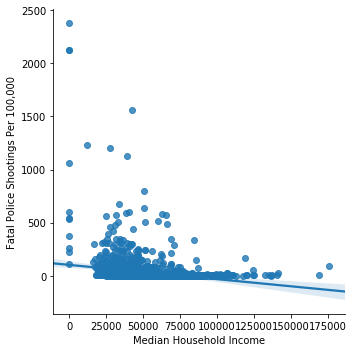

In [53]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final)

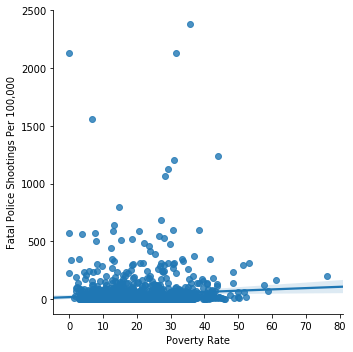

In [54]:
sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final)

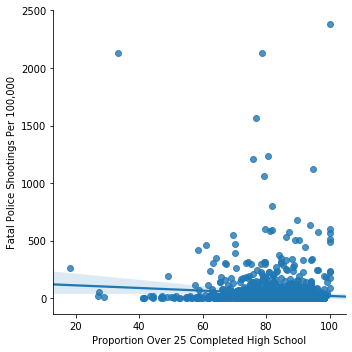

In [55]:
sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final)

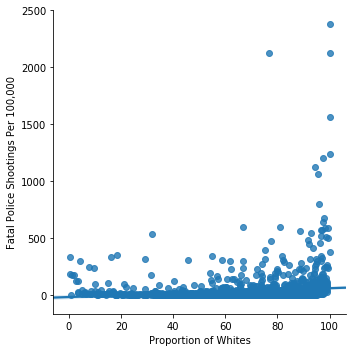

In [56]:
sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final)

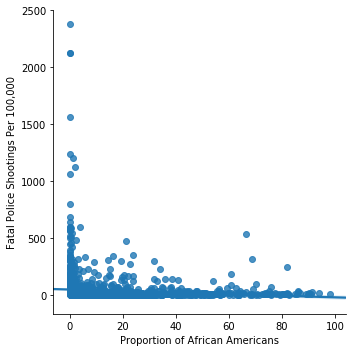

In [57]:
sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final)

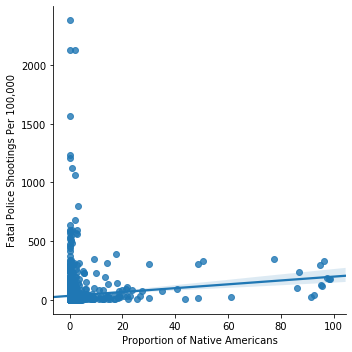

In [58]:
sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final)

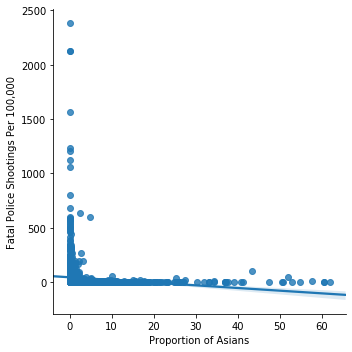

In [59]:
sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final)

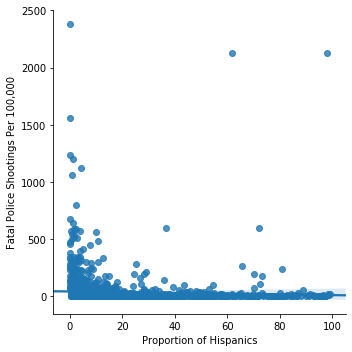

In [60]:
sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final)

In [61]:
Final_without_single_fatals=Final.copy()
Final_without_single_fatals

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
994,Little Orleans,MD,1,42.0,2380.952381,0.0,35.7,100.0,100.0,0.0,0.0,0.0,0.0
301,Chapeno,TX,1,47.0,2127.659574,0.0,31.7,33.3,100.0,0.0,0.0,0.0,97.9
1811,Valdez,CO,1,47.0,2127.659574,0.0,0.0,78.6,76.6,0.0,2.1,0.0,61.7
1739,Talking Rock,GA,1,64.0,1562.500000,42500.0,6.7,76.7,100.0,0.0,0.0,0.0,0.0
180,Booneville,KY,1,81.0,1234.567901,12083.0,43.9,80.6,100.0,0.0,0.0,0.0,0.0
571,Fairview,OH,1,83.0,1204.819277,27500.0,30.9,75.9,97.6,1.2,0.0,0.0,1.2
1359,Pelzer,SC,1,89.0,1123.595506,38750.0,29.3,94.7,94.4,2.2,1.1,0.0,4.5
1511,Rome,OH,1,94.0,1063.829787,0.0,28.2,79.3,95.7,0.0,2.1,0.0,1.1
1130,Millston,WI,1,125.0,800.000000,50536.0,14.7,82.0,96.0,0.0,3.2,0.0,2.4
1386,Pine River,WI,1,147.0,680.272109,33571.0,27.2,89.6,98.0,0.0,2.0,0.0,0.0


In [67]:
drop_these = Final_without_single_fatals[Final_without_single_fatals['Fatal Police Shootings'] == 1 ].index
Final_without_single_fatals.drop(drop_these , inplace=True)
Final_without_single_fatals=Final_without_single_fatals.drop([1568])
Final_without_single_fatals

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
1517,Rosebud,SD,2,1587.0,126.023945,31172.0,43.7,75.0,3.4,0.2,95.0,0.1,4.9
484,Dunsmuir,CA,2,1650.0,121.212121,24770.0,24.5,88.3,87.5,1.9,1.0,0.9,10.1
1200,Nashua,IA,2,1663.0,120.264582,46121.0,6.6,94.0,98.6,0.4,0.0,0.5,0.1
407,Crandon,WI,2,1920.0,104.166667,36685.0,18.5,85.0,86.1,0.4,9.3,0.3,2.1
374,Colorado City,CO,2,2193.0,91.199270,52697.0,21.5,100.0,92.8,0.9,1.5,0.2,13.8
1717,Sugar Creek,MO,3,3345.0,89.686099,35738.0,15.5,88.2,90.9,2.5,0.5,0.6,7.1
15,Alamo,TN,2,2461.0,81.267777,35441.0,21.9,76.1,72.3,15.8,0.0,0.1,11.9
1769,Timberville,VA,2,2522.0,79.302141,40645.0,21.2,80.2,93.8,1.1,0.4,0.0,5.8
1524,Rossville,GA,3,4105.0,73.081608,32182.0,34.3,68.1,88.1,8.0,0.3,0.4,2.8
1492,Rising Sun,MD,2,2781.0,71.916577,55893.0,14.7,87.4,95.8,0.7,0.7,0.6,2.6


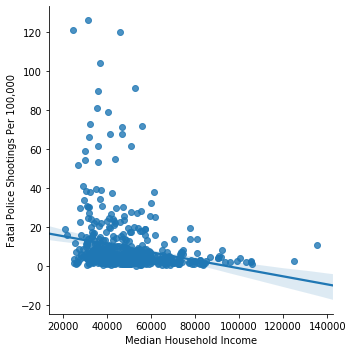

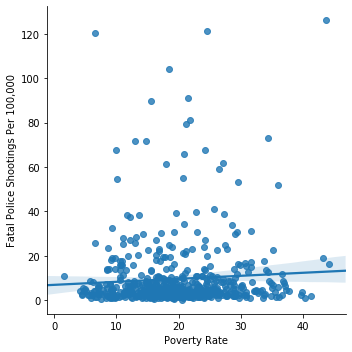

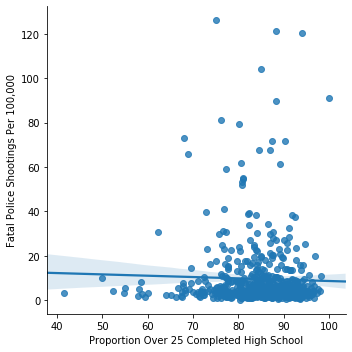

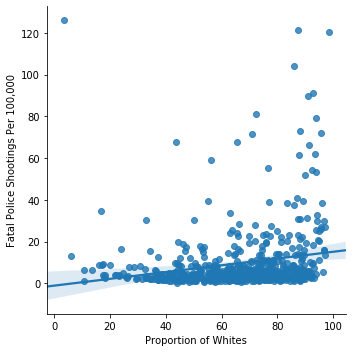

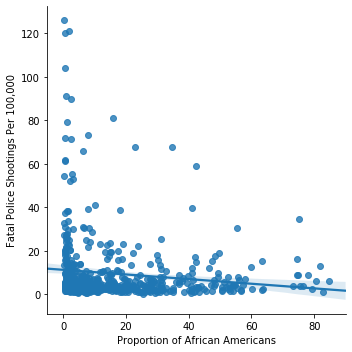

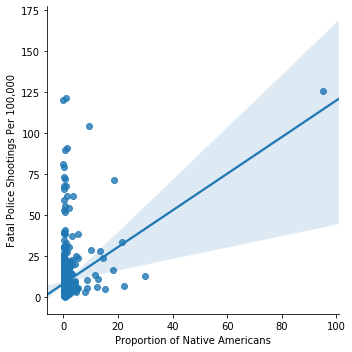

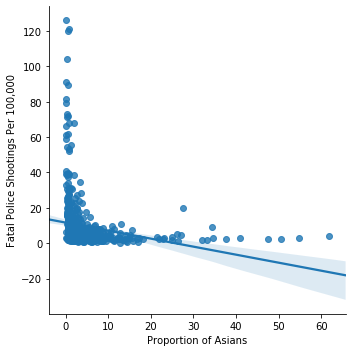

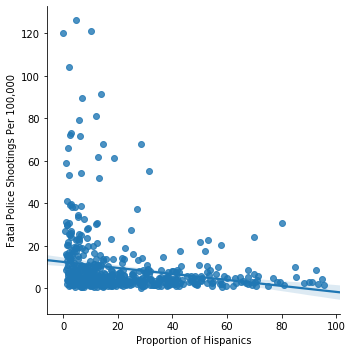

In [68]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_without_single_fatals)

In [76]:
Final_over_arbitrary_pop=Final.copy()
drop_these2 = Final_over_arbitrary_pop[Final_over_arbitrary_pop['Population'] <= 40000 ].index
Final_over_arbitrary_pop.drop(drop_these2, inplace=True)
#Final_pop_over_50000=Final_pop_over_50000.drop([1568])
Final_over_arbitrary_pop

,City,State,Fatal Police Shootings,Population,"Fatal Police Shootings Per 100,000",Median Household Income,Poverty Rate,Proportion Over 25 Completed High School,Proportion of Whites,Proportion of African Americans,Proportion of Native Americans,Proportion of Asians,Proportion of Hispanics
587,Flagstaff,AZ,9,65870.0,13.663276,48680.0,24.2,91.3,73.4,1.9,11.7,1.9,18.4
614,Fort Pierce,FL,5,41590.0,12.022121,25635.0,36.6,76.1,45.3,40.9,0.6,0.9,21.6
1439,Pueblo,CO,12,106595.0,11.257564,34550.0,25.0,85.3,75.2,2.5,2.2,0.8,49.8
953,Las Cruces,NM,10,97618.0,10.244012,41330.0,24.4,85.5,75.3,2.4,1.7,1.6,56.8
304,Charleston,WV,5,51400.0,9.727626,48442.0,19.6,91.9,78.4,15.5,0.2,2.3,1.4
1694,St. Louis,MO,31,319294.0,9.708920,35599.0,27.1,84.1,43.9,49.2,0.3,2.9,3.5
784,Hilo,HI,4,43263.0,9.245776,53939.0,18.3,92.5,17.6,0.5,0.3,34.3,10.4
279,Casper,WY,5,55316.0,9.038976,57790.0,10.5,91.8,92.3,1.0,0.9,0.8,7.4
1466,Redding,CA,8,89861.0,8.902639,43341.0,18.8,90.6,85.8,1.2,2.3,3.4,8.7
766,Hemet,CA,7,78657.0,8.899399,33989.0,26.0,79.5,67.7,6.4,1.6,3.0,35.8


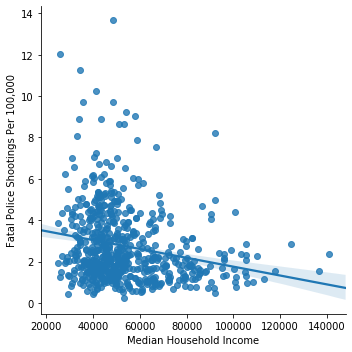

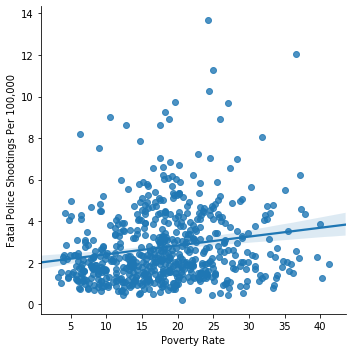

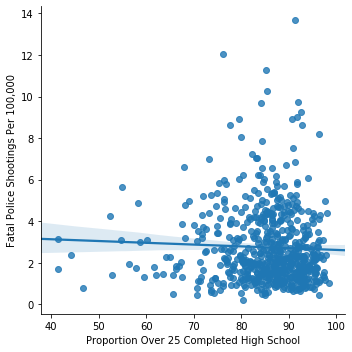

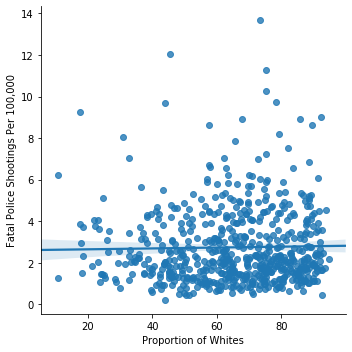

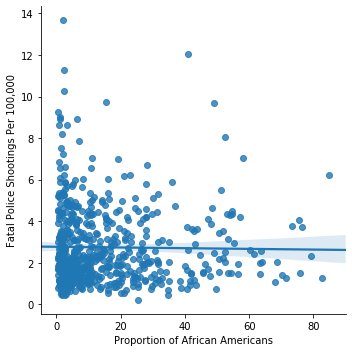

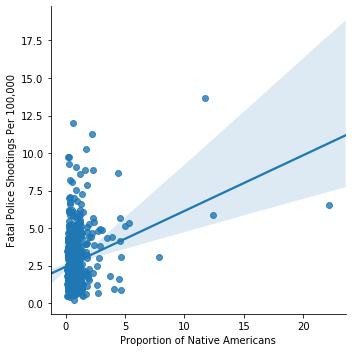

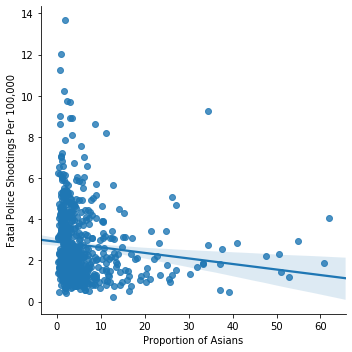

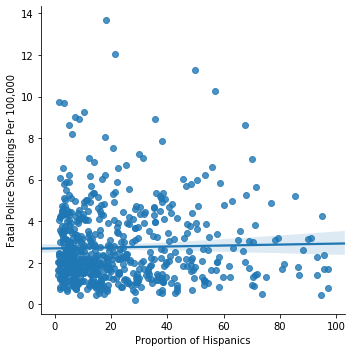

In [77]:
sns.lmplot(x='Median Household Income', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Poverty Rate', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion Over 25 Completed High School', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Whites', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of African Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Native Americans', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Asians', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

sns.lmplot(x='Proportion of Hispanics', y='Fatal Police Shootings Per 100,000', data=Final_over_arbitrary_pop)

In [64]:
#DON'T DELETE THIS




'''NOTE TO LARRY LATER: I HEAVILY LEAN TOWARDS JUST USING ==, MESS AROUND WITH THE CLEANING OF Population A BIT TO SEE JUST HOW MUCH WE REALLY NEED TO CLEAN THE SHIT
ONE PARTICULAR NOTE IS ANCHORAGE, WHY IS IT EMPTY?'''
'having a space messed things up about as much as keeping CDP'
'spaces and city no lowercase did about the same, one more knocked off'
'lower case removed 3 from the good list'
'Anchorage is Anchorage municipality...'
'town and village also had to be removed, they started with lowercases'
'''put Affton MO into presentation as an example of what to do with CDPs and 
why you had to strike them off''' '~300'
"Athens, georgia, is actually Athens-Clarke County unified government"
"Augusta, georgia has the same problem"
"Barona Indian Reservation, Indian Reservations probably aren't counted"
"Boise Idaho, is Boise City, Idaho in the Census..."
"Bon Aqua TX, is Bon Aqua Junction"
"Braintree MA is Braintree Town city"
"Bronx, Brooklyn, Queens aren't in NY..."
"Byram NJ, Byram Township isn't on the excel..."
"Louisville KY is Louisville/Jefferson County metro government"'~4'
"Nashville is Nashville-Davidson metropolitan government"'~10'
"Honolulu had Urban in front of it"
"the ones with a long ass name are double counted too..."
"Florence CA is Florence-Graham CA"
"St in police is St. in population"'~20'
'''  everyting with a - in it
['Grant-Valkaria', 1, 'FL', 0.00025974025974025974]
['Helena-West Helena', 1, 'AR', 8.141996417521577e-05]
['Opa-Locka', 1, 'FL']
['Pinetop-Lakeside', 1, 'AZ', 0.00023353573096683791]
['Soddy-Daisy', 2, 'TN', 0.00015730690577316344]
['Winston-Salem', 1, 'NC', 4.3550782389805635e-06]'''
'''for some reason a lot of the cities had (balance) in the names, we weren't
sure why it's there because the line above them always had the same city
Happened to Athens, August GA, Indianopolis, Louisville, Nashville
Most didn't have more than 5000 ppl difference, but Nashville had 20k 
differenceand Louisville has a 200k difference...
'''
'''Geneva WI isnt in census,  Hollywood isnt in the Census(prob belings with 
the NY stuff),  Puna isnt in Census,  theres like 50 more in the cities with 
only one police shootings, but Im not gonna go through all of them'''





"we should manually Add Washington DC, Boise and Louisville"


'we should manually Add Washington DC, Boise and Louisville'

In [65]:
'''for Median Income and Race: modified Washington DC and indianopolis to remove hanging space, New York City changed to New York, Boise City changed to Boise'''

'for Median Income and Race: modified Washington DC and indianopolis to remove hanging space, New York City changed to New York, Boise City changed to Boise'

In [66]:
'''for all the other ones and Race, Athens, Augusta, Butte, Louisville, and Nashville needed to have their (balance) parts removed'''

'for all the other ones and Race, Athens, Augusta, Butte, Louisville, and Nashville needed to have their (balance) parts removed'